In [5]:
%load_ext autoreload
%autoreload 2

## (Strategy Proofness - First Order Stochastic Dominance)
$$
\forall i\in W\cup F \ \forall \succ_i \forall \succ_{-i} \forall \succ'_i \forall j \\
\sum_{j'\succeq j}(g_{ij'}(\succ'_i,\succ_{-i})-g_{ij'}(\succ_i,\succ_{-i})) \leq 0
$$

## (Ex-ante Stability)
$\nexists (w,f)\in W\times F$ s.t. $\exist f'\ [g_{wf'}(\succ)>0\land f\succ_w f']\ \exist w'\ [g_{w'f}(\succ)>0\land w\succ_f w']$

## (Stability of Deterministic Matching)
$$
\forall (w,f)\in W\times F \ g_{wf}+\sum_{f'\succ_w f}g_{wf'}+\sum_{w'\succ_f w}g_{w'f}\geq 1
$$

## (Ex-post Stability)
A randomized matching is **ex-post stable** iff it can be decomposed into deterministic stable matchings.

## (Fractionally Stable)
$$
\forall (w,f)\in W\times F \ g_{wf}+\sum_{f'\succ_w f}g_{wf'}+\sum_{w'\succ_f w}g_{w'f}\geq 1
$$

### (Violation of Fractionally Stability)
$$
\sum_\succ\sum_w\sum_f\max\left\{0,1-g_{wf}(\succ)-\sum_{w'\succ_f w}g_{w'f}(\succ)-\sum_{f'\succ_w f}g_{wf'}(\succ)\right\}
$$

## (Primal)
$$
\begin{align*}
    \min & \sum_\succ\sum_w\sum_f t_{wf}(\succ)\\
    \text{s.t.} & \sum_f g_{wf}(\succ)\leq 1 & \forall\succ\forall w \\
    & \sum_w g_{wf}(\succ)\leq 1 & \forall \succ\forall f\\
    & t_{wf}(\succ)\geq 1-g_{wf}(\succ)-\sum_{w'\succ_f w}g_{w'f}(\succ)-\sum_{f'\succ_w f}g_{wf'}(\succ) & \forall\succ\forall w\forall f\\
    & \sum_{f'\succ_wf}(g_{wf'}(\succ_w',\succ_{-w})-g_{wf'}(\succ))\leq 0 & \forall\succ\forall w\forall\succ_{w}'\forall f\\
    & \sum_{w'\succ_fw}(g_{w'f}(\succ_f',\succ_{-f})-g_{w'f}(\succ))\leq 0 & \forall\succ\forall f\forall\succ_{f}'\forall w\\
    & g_{wf}(\succ)\geq 0,\ t_{wf}(\succ)\geq 0 & \forall\succ\forall w \forall y
\end{align*}
$$



## (Dual)
$$
\begin{align*}
    \min & \sum_\succ\left(\sum_wx_w(\succ)+\sum_fy_f(\succ)-\sum_w\sum_fz_{wf}(\succ)\right)\\
    \text{s.t.}  \\
    & \forall \succ \forall w \forall f\\
    & x_w(\succ)+y_f(\succ)-z_{wf}(\succ)-\sum_{f'\prec_wf}z_{wf'}(\succ)-\sum_{w'\prec_fw}z_{w'f}(\succ)-\sum_{\succ_w'}\left(\sum_{f'\prec_w f}u_{wf'}(\succ_w',\succ_w,\succ_{-w})-\sum_{f'\prec_w'f}u_{wf'}(\succ_w,\succ_w',\succ_{-w})\right)-\sum_{\succ_f'}\left(\sum_{w'\prec_fw}v_{w'f}(\succ_f',\succ_f,\succ_{-f})-\sum_{w'\prec_f'w}v_{w'f}(\succ_f,\succ_f',\succ_{-f})\right)\geq 0 & \forall\succ\forall w\forall f\\
    & x_w(\succ)\geq 0,\ y_f(\succ)\geq 0,\ 0\leq z_{wf}(\succ)\leq 1 & \forall\succ\forall w\forall f\\
    & u_{wf}(\succ'_w,\succ_w,\succ_{-w})\geq 0 & \forall\succ\forall w\forall\succ_w'\forall f\\
    & v_{wf}(\succ'_f,\succ_f,\succ_{-f})\geq 0 & \forall\succ\forall f\forall\succ_f'\forall w
\end{align*}
$$

In [6]:
import os
import sys
import time
import logging
import argparse
import numpy as np
from random import random
import itertools
from pathlib import Path

sys.path.append(str(Path("primal_dual_matching.ipynb").resolve().parent.parent))

import torch
import torch.nn
from torch import optim
import torch.nn.functional as F

from data import Data

from primal_net import PrimalNet
from primal_loss import *
from primal_train import *

#from dual_net import DualNet
#from dual_loss import *
#from dual_train import *

import torch
import matplotlib.pyplot as plt
import seaborn as sns

### 2*2

In [14]:
device = "mps" #if torch.cuda.is_available() else "cpu"
lambd = np.ones((2,2))*0.001
# lambd = cfg.lambd

cfg = HParams(num_agents = 2,
              device = device,
              lambd = lambd,
              rho = 0.1,
              lagr_iter = 1000,
              batch_size = 512)

cfg.lr = 1e-4

np.random.seed(cfg.seed)

G = Data(cfg)

model = PrimalNet(cfg)
model.to(device)

train_primal(cfg,G,model)

2024-12-05 17:58:15,002:INFO:[TRAIN-ITER]: 0, [Time-Elapsed]: 0.152208, [Total-Loss]: 0.253666
2024-12-05 17:58:15,005:INFO:[CONSTR-Vio]: 0.000455, [OBJECTIVE]: 0.253666
2024-12-05 17:58:17,682:INFO:[TRAIN-ITER]: 100, [Time-Elapsed]: 2.832550, [Total-Loss]: 0.000527
2024-12-05 17:58:17,684:INFO:[CONSTR-Vio]: 0.000039, [OBJECTIVE]: 0.000527


KeyboardInterrupt: 

### 3* 3

In [ ]:
device = "mps" #if torch.cuda.is_available() else "cpu"
lambd = np.ones((3,3))*0.001
# lambd = cfg.lambd

cfg = HParams(num_agents = 3,
              device = device,
              lambd = lambd,
              rho = 0.1,
              lagr_iter = 100,
              batch_size = 128,
              epochs = 1000)

cfg.lr = 1e-4

np.random.seed(cfg.seed)

G = Data(cfg)

In [61]:
G.generate_batch(batch_size=1)

(array([[[1.        , 0.33333333, 0.66666667],
         [0.66666667, 1.        , 0.33333333],
         [1.        , 0.66666667, 0.33333333]]]),
 array([[[0.66666667, 0.33333333, 0.66666667],
         [0.66666667, 0.66666667, 0.33333333],
         [0.33333333, 0.33333333, 0.66666667]]]))

In [62]:
model = PrimalNet(cfg)
model.to(device)

PrimalNet(
  (input_block): Sequential(
    (0): Linear(in_features=18, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=256, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=256, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=256, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
  )
  (layer_out): Linear(in_features=256, out_features=9, bias=True)
)

In [85]:
train_primal(cfg,G,model)

2024-12-16 15:44:00,516:INFO:[TRAIN-ITER]: 0, [Time-Elapsed]: 1.705451, [Total-Loss]: 4090639552652247040.000000
2024-12-16 15:44:00,534:INFO:[CONSTR-Vio]: 0.001060, [OBJECTIVE]: 4090639552652247040.000000, [EFFICIENCY]:  1.542577
2024-12-16 15:44:15,733:INFO:[TRAIN-ITER]: 9, [Time-Elapsed]: 16.923318, [Total-Loss]: 3797588642646458368.000000
2024-12-16 15:44:15,736:INFO:[CONSTR-Vio]: 0.000998, [OBJECTIVE]: 3797588642646458368.000000, [EFFICIENCY]:  1.559441
2024-12-16 15:44:15,737:INFO:train ended!


### plot

In [ ]:
def plot_matching(p, q, match):
    # Move tensor to CPU and convert to NumPy
    output_matrix = match.squeeze().detach().cpu().numpy()

    annotations = np.empty_like(output_matrix, dtype=object)
    for i in range(output_matrix.shape[0]):
        for j in range(output_matrix.shape[1]):
            annotations[i, j] = f'{output_matrix[i, j]:.2e}\n[{p[i, j]}, {q[j, i]}]'

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(output_matrix, annot=annotations, fmt='', cmap='Blues', cbar=True)
    plt.title("Agent Relationship Heatmap with Vector Details")
    plt.xlabel("Agent")
    plt.ylabel("Agent")
    plt.show()


In [ ]:
p = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)
q = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)

output = model(p, q)

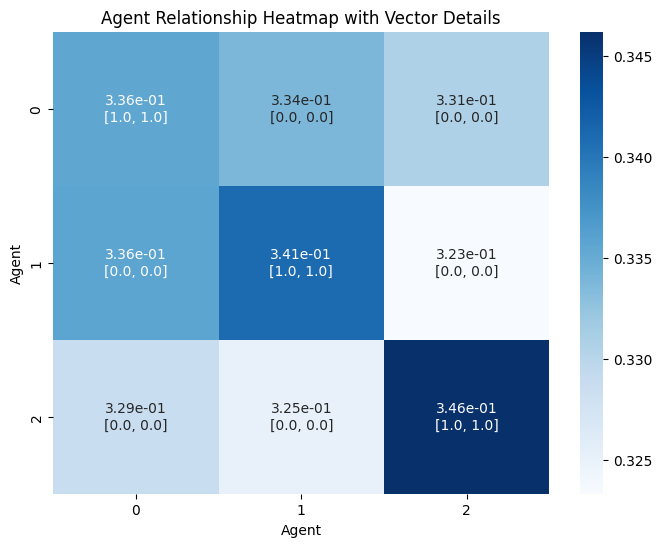

In [ ]:
plot_matching(p, q, output)

### compare

In [86]:
p = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)
q = torch.tensor([[1, 0.0, 0], [0, 1, 0], [0, 0, 1]]).to(device)

output = model(p, q)

In [87]:
output

tensor([[[0.3311, 0.3347, 0.3342],
         [0.3350, 0.3275, 0.3375],
         [0.3341, 0.3375, 0.3284]]], device='mps:0', grad_fn=<DivBackward0>)

In [ ]:
print(f'stability_loss: {}')
print(f'efficiency_loss: {}')

In [ ]:
da_output = da_with_tie(p, q)

In [ ]:
da_output

In [77]:
from efficiency_loss import generate_stable_matchings, filter_efficient_stable_matchings

In [78]:
stable_matching = generate_stable_matchings(p, q)

In [79]:
stable_matching

[(0, 1, 2)]

In [45]:
generate_efficient_stable_matchings(stable_matching, p, q)

[(0, 1, 2)]